# Point 4

- Can you say something about employer behavior when shortlisting (preselecting candidates)?


#### Import Libraries

In [2]:
import pandas as pd
from difflib import SequenceMatcher
import seaborn as sns
import matplotlib.pyplot as plt

#### Load data

This dataset was created using <b> job_candidate_match.sql </b> , a query that would join job information with candidate work_experience flattened into a column called cv and a column shortlisted, indicating if the candidate was shortlisted (1) or not (0). 

In [3]:
df = pd.read_csv('../data/shortlist_data.csv', sep=',', dtype={'cv': 'str','position_name': 'str'})

In [4]:
df.head()

,id_job,id_candidate,duration,required_work_experience,job_type,salary_period,salary,position_name,cv,experience,shortlisted
0,00cda46558edg9161g429bgcf51g361f448c,4d79e19c6321ga2f0g4406gb57cg646e389e,PERMANENT,1-2 Years,FULL_TIME,NaN,NaN,Wait staff,Warehouse manager Warehouse shipping and recei...,3+ Years 2-3 Years,1
1,00cda46558edg9161g429bgcf51g361f448c,850c17a3804cgba50g4bbbga98agfaf89457,PERMANENT,1-2 Years,FULL_TIME,NaN,NaN,Wait staff,care of the elderly Cashier Bakery assistant W...,1-2 Years Less than 1 Year,1
2,00cda46558edg9161g429bgcf51g361f448c,90aaeef9ac9cg9d94g431fg9457gb01b413b,PERMANENT,1-2 Years,FULL_TIME,NaN,NaN,Wait staff,Server Make up artist,1-2 Years Less than 1 Year,1
3,014681c9b6cbgb6dfg439fgcc8eg3a1ccaf9,148c322c2106g8bf8g451eg2a25g2232a557,NaN,No,NONE,NaN,NaN,Cook,Baker Line cook,Less than 1 Year,1
4,014681c9b6cbgb6dfg439fgcc8eg3a1ccaf9,48b8a8183752g8f10g4c67g5f01gb244ea9a,NaN,No,NONE,NaN,NaN,Cook,Busser,1-2 Years,1


<b> cv </b> is a column that compress all the information about candidate past job titles. <br>
<b> position_name </b> is a column indicating information about job position name <br> 

In [6]:
#Transform columns to lower case. 
df['cv'] = df['cv'].str.lower()
df['position_name'] = df['position_name'].str.lower()

## Strategy Approach  

I would like to know if applying some function of string similarity between past experience cv previously constructed and the position_name would indicate a difference in the average of being shortlisted or not.  

In [7]:
df['similarity']= df[['cv','position_name']].apply(lambda row: SequenceMatcher(None, str(row['cv']), str(row['position_name'])).ratio(), axis=1)

In [8]:
df[['cv','position_name','similarity','shortlisted']].head()

,cv,position_name,similarity,shortlisted
0,warehouse manager warehouse shipping and recei...,wait staff,0.227273,1
1,care of the elderly cashier bakery assistant w...,wait staff,0.179775,1
2,server make up artist,wait staff,0.193548,1
3,baker line cook,cook,0.421053,1
4,busser,cook,0.000000,1


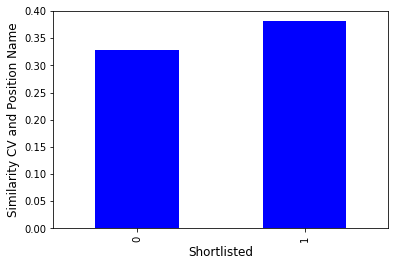

In [9]:
ax = df.groupby(['shortlisted']).mean()['similarity'].plot(kind='bar', color = "blue")
ax.set_xlabel("Shortlisted", fontsize=12)
ax.set_ylabel("Similarity CV and Position Name", fontsize=12)
plt.show()

### Conclutions

Employers tend to shortlist in average a little more from candidates with a higher string match score  between past job titles and job title posted but might not be significant, is important to take into account that similarity was made on the fly and not very rigorous. Future job could be improve this score marching with maybe a <b> Bag of Words </b> approach. 
